# Data Science in a Day

## Problem statement
Given data on loans that we've given in the past, we want to be able to predict whether a new customer should be given a loan or not. This is to aid decision making when it comes to offering loans at our bank.

## Loading Libraries

In [97]:
# import pandas library to read, manipulate and analyse data
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report

import graphviz
import pydotplus

warnings.filterwarnings("ignore")

%matplotlib inline

## Data Sourcing

In [6]:
#load data from loans csv
loan_df = pd.read_csv("loan_data.csv")



<bound method NDFrame.head of     Loan_ID  Gender Married Dependents     Education Self_Employed  \
0      LP-0    Male      No          0      Graduate            No   
1      LP-1    Male     Yes          1      Graduate            No   
2      LP-2    Male     Yes          0      Graduate           Yes   
3      LP-3    Male     Yes          0  Not Graduate            No   
4      LP-4    Male      No          0      Graduate            No   
5      LP-5    Male     Yes          2      Graduate           Yes   
6      LP-6    Male     Yes          0  Not Graduate            No   
7      LP-7    Male     Yes         3+      Graduate            No   
8      LP-8    Male     Yes          2      Graduate            No   
9      LP-9    Male     Yes          1      Graduate            No   
10    LP-10    Male     Yes          2      Graduate            No   
11    LP-11    Male     Yes          2      Graduate           NaN   
12    LP-12    Male     Yes          2      Graduate        

In [8]:
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP-5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP-6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP-7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP-8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP-9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
type(loan_df)


pandas.core.frame.DataFrame

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
Loan_ID              981 non-null object
Gender               968 non-null object
Married              978 non-null object
Dependents           966 non-null object
Education            981 non-null object
Self_Employed        949 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           959 non-null float64
Loan_Amount_Term     967 non-null float64
Credit_History       931 non-null float64
Property_Area        981 non-null object
Loan_Status          981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 99.7+ KB


In [12]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,959.000000,967.000000,931.000000
mean,5179.795107,1601.916330,141.768509,340.078594,0.809882
std,5695.104533,2718.772806,77.899222,70.246667,0.392605
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP-0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP-1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP-2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP-3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP-4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
loan_df.shape

(981, 13)

## Data Cleaning 

In [16]:
#check for missing or null values in loan dataframe
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#deal with nulls in gender column
loan_df = loan_df.dropna(subset= ['Gender'])
loan_df.isnull().sum()


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#deal with na's in Married column

In [29]:
loans = loan_df
loans['Married'] = loans['Married'].fillna('No')

C:\Users\250-i5-G6-w10-1011\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# deal with dependents
loans['Dependents'].value_counts()

0     548
1     159
2     158
3+     88
Name: Dependents, dtype: int64

In [35]:
loans['Dependents'].dtype
loans['Dependents'] = loans['Dependents'].fillna('0')

C:\Users\250-i5-G6-w10-1011\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
loans = loans.dropna(subset=['Self_Employed'])

In [40]:
#deal with null loan amounts
loans = loans.dropna(subset=['LoanAmount'])
loans.shape[0] - loans.dropna().shape[0]

56

In [45]:
#deal with loan term
loans = loans.dropna(subset=['Loan_Amount_Term'])
loans.shape[0] - loans.dropna().shape[0]

43

In [49]:
#deal with Credit History
loans['Credit_History'] = loans['Credit_History'].fillna(0)
loans.shape[0] - loans.dropna().shape[0]

0

In [50]:
loans.shape

(902, 13)

## Data Exploration

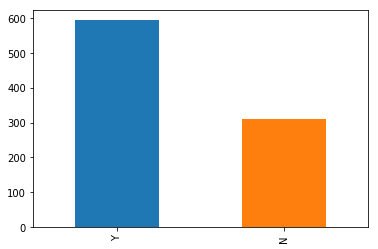

In [58]:
loans['Loan_Status'].value_counts().plot(kind='bar')

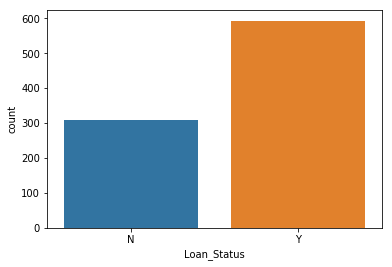

In [60]:
sns.countplot(x=loans['Loan_Status'])

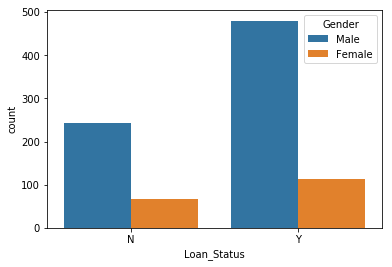

In [61]:
sns.countplot(x=loans['Loan_Status'], hue=loans['Gender'])

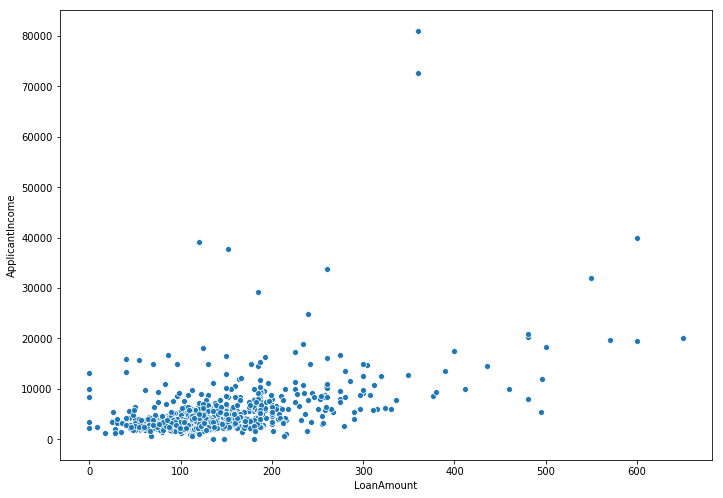

In [76]:
# loan amount vs loan amount term

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(x=loans['LoanAmount'], y=loans['ApplicantIncome'], ax=ax)

## Data Transformation

In [78]:
#split into features and target variable -- by column

feats = loans.drop(['Loan_Status'], axis = 1)

target = loans['Loan_Status']

In [80]:
#drop id column
feats = feats.drop(['Loan_ID'], axis=1)
feats.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban


In [82]:
feats = pd.get_dummies(feats)

In [86]:
# split the data into training and test sets
train_feats, test_feats, train_target, test_target = train_test_split(feats, target, random_state=3, test_size=0.3)

In [87]:
train_feats.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
22,2600,1911.0,116.0,360.0,0.0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,0
131,2014,1929.0,74.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
475,16525,1014.0,150.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0
848,2157,1788.0,104.0,360.0,1.0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
273,2620,2223.0,150.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0


### Modelling

In [131]:
tree_model = DecisionTreeClassifier()
tree_model_3 = DecisionTreeClassifier(max_depth=3)

In [132]:
tree_model.fit(train_feats, train_target)
tree_model_3.fit(train_feats, train_target)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

          N       0.44      0.59      0.50        97
          Y       0.72      0.59      0.65       174

avg / total       0.62      0.59      0.60       271



### Making Predictions

In [134]:
predictions = tree_model.predict(test_feats)
predictions_3 = tree_model_3.predict(test_feats)


In [121]:
predictions == test_target


368     True
815     True
883     True
206     True
98      True
269     True
673    False
59      True
709     True
598     True
300     True
717     True
471     True
859     True
517     True
513    False
173     True
889     True
285     True
110     True
888     True
494     True
654    False
412     True
302     True
150     True
615    False
835     True
414     True
452     True
       ...  
795     True
675    False
721     True
6       True
402     True
245    False
604     True
404    False
791     True
828     True
351    False
306     True
187    False
399     True
650    False
119     True
668     True
370     True
481     True
217     True
916    False
433     True
260    False
16     False
200     True
843     True
653    False
139    False
646    False
405     True
Name: Loan_Status, Length: 271, dtype: bool

In [125]:
print(classification_report(test_target, predictions))


             precision    recall  f1-score   support

          N       0.69      0.43      0.53        97
          Y       0.74      0.89      0.81       174

avg / total       0.72      0.73      0.71       271



Now that we've trained our models, it's time to put them to the test. We'll do this by predicting test set values and comparing those predictions to the values we already know are the ground truth. 

We need to compare those values with the test set!

In [126]:
dot_data = export_graphviz(tree_model, feature_names=feats.columns, filled=True, rounded=True, out_file=None, class_names=['No','Yes'])

In [128]:
graph = graphviz.Source(dot_data)

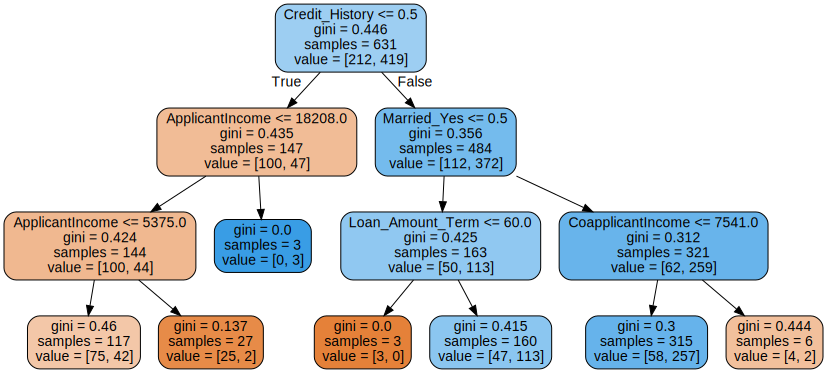

In [124]:
graph

In [129]:
# Predictions - model 2


In [136]:
print("MOdel with only 3 levels")
print(classification_report(test_target, predictions_3))
print("MOdel with unlimited levels")
print(classification_report(test_target, predictions))

MOdel with only 3 levels
             precision    recall  f1-score   support

          N       0.69      0.43      0.53        97
          Y       0.74      0.89      0.81       174

avg / total       0.72      0.73      0.71       271

MOdel with unlimited levels
             precision    recall  f1-score   support

          N       0.44      0.59      0.50        97
          Y       0.72      0.58      0.64       174

avg / total       0.62      0.58      0.59       271



## Model Evaluation

Q: Which model is better? 
> A: 


Q: Why?
> A:

Link to *Stupid Data Miner tricks paper* (Overfitting the S&P 500)
https://www.researchgate.net/publication/247907373_Stupid_Data_Miner_Tricks_Overfitting_the_SP_500